# Exercise: Shortest $s$-$t$-path 
<font color='blue'><b>Goal:</b></font>
Computing the $s$-$t$ distance through linear programming in two different ways.

<font color='blue'><b>Required packages:</b></font>`pulp`, `networkx`, `random`, `matplotlib`

We are given a directed graph $G=(V,A)$ with arc lengths $\ell: A \to \mathbb{Z}_{\geq 0}$, and two distinct vertices $s,t\in V$. Our goal is to compute the $s$-$t$ distance $\mathrm{d}(s,t)$, i.e., the distance from $s$ to $t$ in $G$, which is defined by

\begin{equation*}
\mathrm{d}(s,t) := \min\left\{\sum_{a\in P} \ell(a) : \text{ $P\subseteq A$, $P$ is an $s$-$t$ path in $G$}  \right\}\enspace.
\end{equation*}

To achieve this, let us use linear programming!

## Toy example instance

Let us start with an easy example. For your convenience, we created a module `shortestPath_module`, which includes some functionality for generating and drawing graphs. Execute the code below to generate and plot a toy example instance. Find a shortest $s$-$t$-path manually!

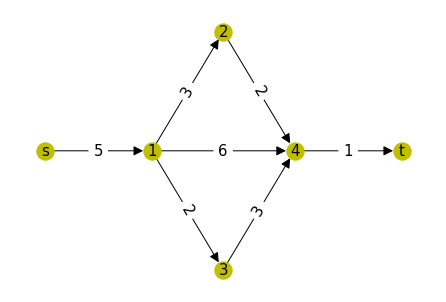

In [64]:
# Import the module
import shortestPath_module as helpers
%matplotlib inline

# Generates and plots example graph
G = helpers.toy_example()
helpers.draw(G)

## An LP-approach

Consider the linear programming formulation seen in class, namely

$$
\begin{array}{rrcll}
\max & d_t \\
     & d_s & = & 0 \\
     & d_v & \leq & d_u + \ell(a) & \forall a=(u,v)\in A \\
     & d_v & \geq & 0 & \forall v\in V\enspace.
\end{array}
$$

Recall that it is proved in the script that the optimal value of the above linear program is indeed equal to the distance $\mathrm{d}(s,t)$. Check the script for all details!

<font color='blue'><b>Your task:</b></font> 

Implement this method to find $\mathrm{d}(s,t)$ via the above linear program in a function

    def distanceSToT(G,s,t)

where $G$ is a directed graph as shown in the toy example above that has an edge attribute named `"length"` storing the edge lengths, and $s$ and $t$ are two distinct vertices of the graph. The function should return the distance $\mathrm{d}(s,t)$ from $s$ to $t$.
      


In [65]:
for e in G.edges:
    print(e)
for n in G.nodes:
    print(n)

('s', 1)
(1, 2)
(1, 3)
(1, 4)
(2, 4)
(3, 4)
(4, 't')
s
1
2
3
4
t


In [66]:
from pulp import *

def distanceSToT(G):
    # IMPLEMENT YOUR FUNCTION HERE
    St_LP = LpProblem("st", LpMaximize)
    
    d = {}
    for n in G.nodes:
        d[n] = LpVariable(f'd{n}', lowBound=0)
    
    St_LP += d['t']
    St_LP += d['s'] == 0
    for e in G.edges:
        St_LP += d[e[1]] <= d[e[0]] + G.edges[e]['length']
    
    print(St_LP)

    St_LP.solve()
    
    dst = value(St_LP.objective)
    return dst

## Testing your implementation

### Check on the toy example

First check on the toy example given above that your procedures computes the correct $s$-$t$ distance by executing the code below. Did you get it right when doing it manually?

In [67]:
helpers.check(distanceSToT, G)

st:
MAXIMIZE
1*dt + 0
SUBJECT TO
_C1: ds = 0

_C2: d1 - ds <= 5

_C3: - d1 + d2 <= 3

_C4: - d1 + d3 <= 2

_C5: - d1 + d4 <= 6

_C6: - d2 + d4 <= 2

_C7: - d3 + d4 <= 3

_C8: - d4 + dt <= 1

VARIABLES
d1 Continuous
d2 Continuous
d3 Continuous
d4 Continuous
ds Continuous
dt Continuous

Your algorithm computes an s-t distance of 11.0.
The actual s-t distance is 11.

Congratulations! Your implementation is correct on the given instance.


### Checks on a random instance

Next, check that your procedure also returns the same $s$-$t$ distance on a randomly generated graph by executing the code below. Note that the generated random graphs might not have an $s$-$t$ path, at all. Just rerun the cell to generate a new one!

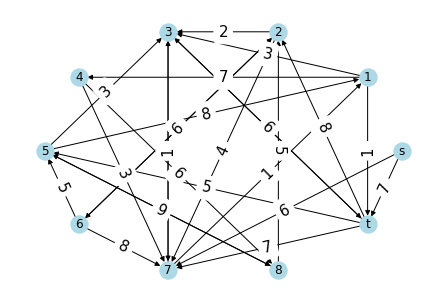

st:
MAXIMIZE
1*dt + 0
SUBJECT TO
_C1: ds = 0

_C2: d7 - ds <= 6

_C3: - ds + dt <= 7

_C4: - d1 + d3 <= 3

_C5: - d1 + d4 <= 7

_C6: - d1 + dt <= 1

_C7: - d2 + d3 <= 2

_C8: - d2 + d6 <= 1

_C9: - d2 + d7 <= 4

_C10: - d3 + d7 <= 5

_C11: - d3 + dt <= 1

_C12: - d4 + d7 <= 3

_C13: - d4 + d8 <= 6

_C14: d1 - d5 <= 8

_C15: d3 - d5 <= 3

_C16: - d5 + d8 <= 5

_C17: d2 - d6 <= 6

_C18: d5 - d6 <= 5

_C19: - d6 + d7 <= 8

_C20: d1 - d7 <= 1

_C21: d3 - d7 <= 1

_C22: d2 - d8 <= 5

_C23: d5 - d8 <= 9

_C24: d2 - dt <= 8

_C25: d3 - dt <= 6

_C26: d5 - dt <= 5

_C27: d7 - dt <= 7

VARIABLES
d1 Continuous
d2 Continuous
d3 Continuous
d4 Continuous
d5 Continuous
d6 Continuous
d7 Continuous
d8 Continuous
ds Continuous
dt Continuous

Your algorithm computes an s-t distance of 7.0.
The actual s-t distance is 7.

Congratulations! Your implementation is correct on the given instance.


In [68]:
# Randomly generate G with given number of nodes
G = helpers.random_graph(10)

# Draw G
helpers.draw(G)

# Check the implementation on G
helpers.check(distanceSToT, G)